In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-07-13 17:00:01--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   237MB/s    in 0.4s    

2022-07-13 17:00:02 (237 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' ")

There are 2 directories and 0 images in 'pizza_steak' 
There are 2 directories and 0 images in 'pizza_steak/test' 
There are 0 directories and 250 images in 'pizza_steak/test/pizza' 
There are 0 directories and 250 images in 'pizza_steak/test/steak' 
There are 2 directories and 0 images in 'pizza_steak/train' 
There are 0 directories and 750 images in 'pizza_steak/train/pizza' 
There are 0 directories and 750 images in 'pizza_steak/train/steak' 


In [6]:
# To understand os.walk
for i in os.walk("pizza_steak"):
  print(i, "\n ----------------")

('pizza_steak', ['test', 'train'], []) 
 ----------------
('pizza_steak/test', ['pizza', 'steak'], []) 
 ----------------
('pizza_steak/test/pizza', [], ['897300.jpg', '1980749.jpg', '1183595.jpg', '416067.jpg', '979933.jpg', '1228171.jpg', '226472.jpg', '419962.jpg', '129666.jpg', '1843754.jpg', '1223284.jpg', '3174637.jpg', '2827154.jpg', '248199.jpg', '89197.jpg', '2508316.jpg', '714866.jpg', '2631321.jpg', '2101820.jpg', '1032754.jpg', '849291.jpg', '96357.jpg', '398812.jpg', '2165223.jpg', '2236338.jpg', '540882.jpg', '3724353.jpg', '2478221.jpg', '195160.jpg', '3442426.jpg', '2619955.jpg', '1280320.jpg', '3827990.jpg', '3724187.jpg', '430904.jpg', '138961.jpg', '1226346.jpg', '65128.jpg', '1412011.jpg', '1925494.jpg', '1001116.jpg', '346091.jpg', '1152100.jpg', '1986128.jpg', '1119571.jpg', '1594097.jpg', '3913440.jpg', '139952.jpg', '3092704.jpg', '373847.jpg', '998005.jpg', '1949644.jpg', '397910.jpg', '2082495.jpg', '3581181.jpg', '80750.jpg', '1398213.jpg', '1380247.jpg', '11

In [7]:
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/"+ random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape} \n")

  return img


Image shape: (384, 512, 3) 



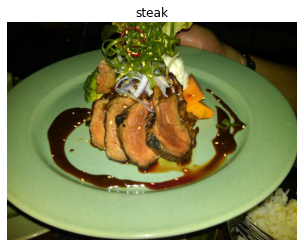

In [9]:
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class = "steak")

In [10]:
img

array([[[  1,   3,   0],
        [  1,   3,   0],
        [  1,   3,   0],
        ...,
        [  0,   2,   0],
        [  0,   2,   0],
        [  0,   2,   0]],

       [[  1,   3,   0],
        [  1,   3,   0],
        [  1,   3,   0],
        ...,
        [  0,   2,   0],
        [  0,   2,   0],
        [  0,   2,   0]],

       [[  1,   3,   0],
        [  1,   3,   0],
        [  1,   3,   0],
        ...,
        [  0,   2,   0],
        [  0,   2,   0],
        [  0,   2,   0]],

       ...,

       [[ 62,  61,  17],
        [ 63,  62,  18],
        [ 63,  62,  18],
        ...,
        [132, 125,  34],
        [123, 116,  26],
        [116, 109,  19]],

       [[ 62,  61,  17],
        [ 63,  62,  18],
        [ 63,  62,  18],
        ...,
        [122, 115,  24],
        [117, 110,  20],
        [117, 110,  20]],

       [[ 63,  62,  18],
        [ 63,  62,  18],
        [ 64,  63,  19],
        ...,
        [115, 108,  17],
        [119, 112,  22],
        [127, 122,  31]]

In [11]:
img/255

array([[[0.00392157, 0.01176471, 0.        ],
        [0.00392157, 0.01176471, 0.        ],
        [0.00392157, 0.01176471, 0.        ],
        ...,
        [0.        , 0.00784314, 0.        ],
        [0.        , 0.00784314, 0.        ],
        [0.        , 0.00784314, 0.        ]],

       [[0.00392157, 0.01176471, 0.        ],
        [0.00392157, 0.01176471, 0.        ],
        [0.00392157, 0.01176471, 0.        ],
        ...,
        [0.        , 0.00784314, 0.        ],
        [0.        , 0.00784314, 0.        ],
        [0.        , 0.00784314, 0.        ]],

       [[0.00392157, 0.01176471, 0.        ],
        [0.00392157, 0.01176471, 0.        ],
        [0.00392157, 0.01176471, 0.        ],
        ...,
        [0.        , 0.00784314, 0.        ],
        [0.        , 0.00784314, 0.        ],
        [0.        , 0.00784314, 0.        ]],

       ...,

       [[0.24313725, 0.23921569, 0.06666667],
        [0.24705882, 0.24313725, 0.07058824],
        [0.24705882, 0

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale= 1./255)
valid_datagen = ImageDataGenerator(rescale= 1./255)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed=42)


model_1 = tf.keras.Sequential([
                                     tf.keras.layers.Conv2D(filters= 10,
                                                            kernel_size=3,
                                                            activation="relu",
                                                            input_shape=(224,224,3)),
                                     tf.keras.layers.Conv2D(10,3,activation="relu"),
                                     tf.keras.layers.Conv2D(10,3,activation="relu"),
                                     tf.keras.layers.MaxPool2D(pool_size = 2,
                                                               padding = "valid"),
                                     tf.keras.layers.Conv2D(10,3,activation = 'relu'),
                                     tf.keras.layers.Conv2D(10,3,activation = 'relu'),
                                     tf.keras.layers.MaxPool2D(2),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(1 , activation="sigmoid")
])



model_1.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))





Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 26s 235ms/step - loss: 0.5732 - accuracy: 0.7187 - val_loss: 0.4186 - val_accuracy: 0.8300
Epoch 2/5
47/47 [==============================] - 15s 314ms/step - loss: 0.4397 - accuracy: 0.7993 - val_loss: 0.4124 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 11s 239ms/step - loss: 0.4121 - accuracy: 0.8220 - val_loss: 0.3234 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 11s 224ms/step - loss: 0.3682 - accuracy: 0.8407 - val_loss: 0.3202 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 10s 209ms/step - loss: 0.3287 - accuracy: 0.8680 - val_loss: 0.3586 - val_accuracy: 0.8460


In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 109, 109, 10)     0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 107, 107, 10)      910       
                                                                 
 conv2d_4 (Conv2D)           (None, 105, 105, 10)      910       
                                                        

In [14]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape = (224,224,3)),
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_2.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))



Epoch 1/5
47/47 [==============================] - 10s 198ms/step - loss: 0.9996 - accuracy: 0.5040 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 188ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 190ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 187ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [15]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [16]:

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(100, activation='relu'), 
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), 
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 195ms/step - loss: 2.7333 - accuracy: 0.6007 - val_loss: 0.8678 - val_accuracy: 0.7240
Epoch 2/5
47/47 [==============================] - 12s 257ms/step - loss: 0.6757 - accuracy: 0.7167 - val_loss: 0.9712 - val_accuracy: 0.6300
Epoch 3/5
47/47 [==============================] - 18s 376ms/step - loss: 0.6513 - accuracy: 0.7227 - val_loss: 0.9430 - val_accuracy: 0.5540
Epoch 4/5
47/47 [==============================] - 12s 260ms/step - loss: 0.5734 - accuracy: 0.7440 - val_loss: 0.4365 - val_accuracy: 0.7880
Epoch 5/5
47/47 [==============================] - 11s 239ms/step - loss: 0.4729 - accuracy: 0.7940 - val_loss: 0.9022 - val_accuracy: 0.5720


In [17]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [18]:
# import zipfile

# # Download zip file of pizza_steak images
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# # Unzip the downloaded file
# zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
# zip_ref.extractall()
# zip_ref.close()

Image shape: (341, 512, 3) 

Image shape: (512, 512, 3) 



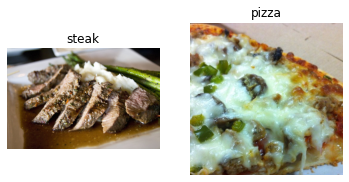

In [19]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
steak_img = view_random_image("pizza_steak/train/", "pizza")

In [20]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [22]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [23]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [24]:
# Get sample images
images[:2], images[0].shape , labels

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [25]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [26]:
model_4 = Sequential([
                      Conv2D(filters = 10,
                             kernel_size = 3,
                             strides = 1,
                             padding = 'valid',
                             activation = 'relu',
                             input_shape = (224, 224, 3)),
                      Conv2D(10, 3, activation = 'relu'),
                      Conv2D(10, 3, activation = 'relu'),
                      Flatten(),
                      Dense(1, activation = 'sigmoid')
])

In [27]:
model_4.compile(loss = 'binary_crossentropy',
              optimizer = Adam(),
              metrics = ['accuracy'])

In [28]:
history_4 = model_4.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 214ms/step - loss: 0.8330 - accuracy: 0.7107 - val_loss: 0.4720 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 10s 206ms/step - loss: 0.4250 - accuracy: 0.8153 - val_loss: 0.3918 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 10s 207ms/step - loss: 0.2953 - accuracy: 0.8887 - val_loss: 0.3673 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 10s 204ms/step - loss: 0.1118 - accuracy: 0.9667 - val_loss: 0.5340 - val_accuracy: 0.7640
Epoch 5/5
47/47 [==============================] - 10s 205ms/step - loss: 0.0331 - accuracy: 0.9920 - val_loss: 0.5623 - val_accuracy: 0.8080


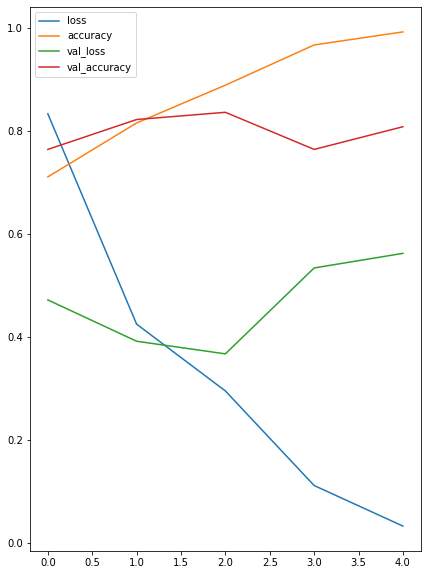

In [29]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(7,10));


In [30]:
pd.DataFrame(history_4.history)

,loss,accuracy,val_loss,val_accuracy
0,0.833016,0.710667,0.471980,0.764
1,0.424969,0.815333,0.391780,0.822
2,0.295307,0.888667,0.367284,0.836
3,0.111812,0.966667,0.533992,0.764
4,0.033092,0.992000,0.562290,0.808


In [31]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot Loss
  plt.figure()
  plt.plot(epochs, loss, label = 'training_loss')
  plt.plot(epochs, val_loss, label = 'val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  #Plot Accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = 'training_accuracy')
  plt.plot(epochs, val_accuracy, label = 'val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

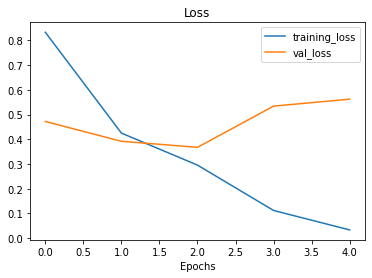

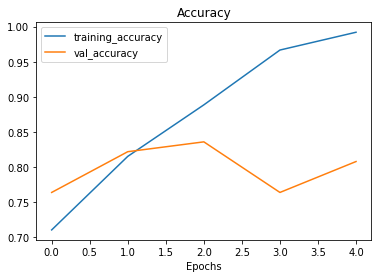

In [32]:
plot_loss_curves(history_4)

In [33]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_6 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [34]:
model_5 = Sequential([
                      Conv2D(10, 3, activation ='relu', input_shape = (224,224,3)),
                      MaxPool2D(pool_size = 2),
                      Conv2D(10, 3, activation = 'relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation = 'relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation = 'sigmoid')
                      
])

In [35]:
model_5.compile(optimizer = Adam(),
                loss = tf.keras.losses.binary_crossentropy,
                metrics = ['accuracy'])

In [36]:
history_5 = model_5.fit(train_data,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

47/47 [==============================] - 10s 202ms/step - loss: 0.6089 - accuracy: 0.6553 - val_loss: 0.4981 - val_accuracy: 0.7940


In [37]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

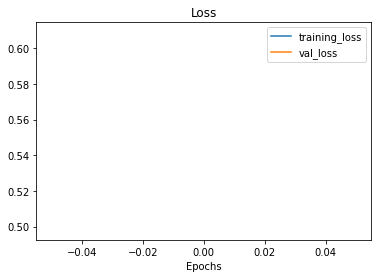

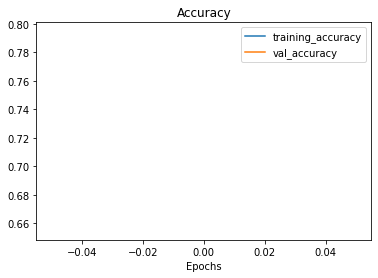

In [38]:
plot_loss_curves(history_5)

In [39]:
# with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255,
                                             rotation_range = 20,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             horizontal_flip = True)
# without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

test_datagen = ImageDataGenerator(rescale=1/255.)

In [40]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) 

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [41]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

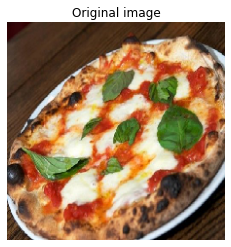

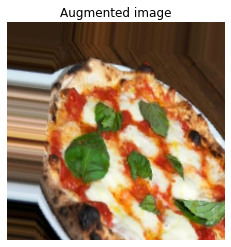

In [42]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [45]:
model_6 = tf.keras.Sequential([
                               Conv2D(10, 3, activation = 'relu', input_shape=(224,224,3)),
                               MaxPool2D(pool_size = 2),
                               Conv2D(10, 3, activation = 'relu'),
                               MaxPool2D(),
                               Conv2D(10, 3, activation = 'relu'),
                               MaxPool2D(),
                               Flatten(),
                               Dense(1, activation = 'sigmoid')
])

model_6.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

history_6 = model_6.fit(train_data_augmented,
                        epochs = 5,
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 541ms/step - loss: 0.7107 - accuracy: 0.4547 - val_loss: 0.6913 - val_accuracy: 0.6040
Epoch 2/5
47/47 [==============================] - 23s 494ms/step - loss: 0.6993 - accuracy: 0.5860 - val_loss: 0.6858 - val_accuracy: 0.5680
Epoch 3/5
47/47 [==============================] - 31s 672ms/step - loss: 0.6913 - accuracy: 0.5067 - val_loss: 0.6654 - val_accuracy: 0.5020
Epoch 4/5
47/47 [==============================] - 23s 495ms/step - loss: 0.6840 - accuracy: 0.6233 - val_loss: 0.6764 - val_accuracy: 0.6480
Epoch 5/5
47/47 [==============================] - 24s 510ms/step - loss: 0.7041 - accuracy: 0.5627 - val_loss: 0.6914 - val_accuracy: 0.5420


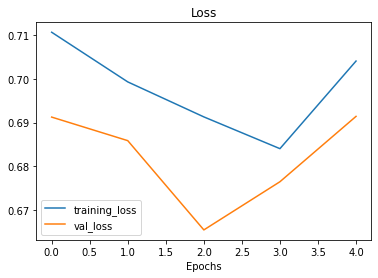

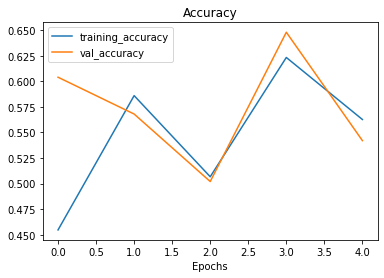

In [46]:
plot_loss_curves(history_6)

In [48]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                             target_size = (224,224),
                                                                             batch_size = 32,
                                                                             class_mode = 'binary',
                                                                             shuffle = True)

Found 1500 images belonging to 2 classes.


In [51]:
model_7 = tf.keras.Sequential([
                               Conv2D(10, 3, activation = 'relu', input_shape = (224,224,3)),
                               MaxPool2D(),
                               Conv2D(10, 3, activation = 'relu'),
                               MaxPool2D(),
                               Conv2D(10, 3, activation = 'relu'),
                               MaxPool2D(),
                               Flatten(),
                               Dense(1, activation = 'sigmoid')
])


model_7.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = Adam(),
                metrics = ['accuracy'])

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 508ms/step - loss: 0.6465 - accuracy: 0.6180 - val_loss: 0.5388 - val_accuracy: 0.7540
Epoch 2/5
47/47 [==============================] - 24s 516ms/step - loss: 0.5844 - accuracy: 0.6913 - val_loss: 0.4614 - val_accuracy: 0.7920
Epoch 3/5
47/47 [==============================] - 23s 492ms/step - loss: 0.5227 - accuracy: 0.7480 - val_loss: 0.4096 - val_accuracy: 0.7920
Epoch 4/5
47/47 [==============================] - 24s 510ms/step - loss: 0.4801 - accuracy: 0.7740 - val_loss: 0.3560 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 24s 512ms/step - loss: 0.4720 - accuracy: 0.7867 - val_loss: 0.3708 - val_accuracy: 0.8400


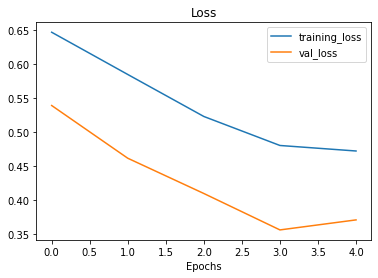

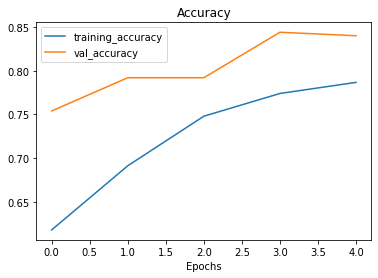

In [52]:
plot_loss_curves(history_7)

In [53]:
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 561ms/step - loss: 0.6597 - accuracy: 0.6320 - val_loss: 0.5563 - val_accuracy: 0.6760
Epoch 2/5
47/47 [==============================] - 25s 538ms/step - loss: 0.5565 - accuracy: 0.7260 - val_loss: 0.4641 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 24s 512ms/step - loss: 0.5344 - accuracy: 0.7427 - val_loss: 0.4269 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 24s 508ms/step - loss: 0.5022 - accuracy: 0.7633 - val_loss: 0.3832 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 24s 512ms/step - loss: 0.4944 - accuracy: 0.7660 - val_loss: 0.3783 - val_accuracy: 0.8380


In [54]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 109, 109, 10)     0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 107, 107, 10)      910       
                                                                 
 conv2d_4 (Conv2D)           (None, 105, 105, 10)      910       
                                                        

In [55]:
model_8.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_26 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_28 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

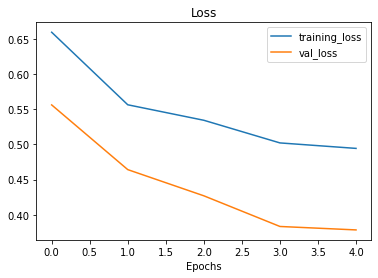

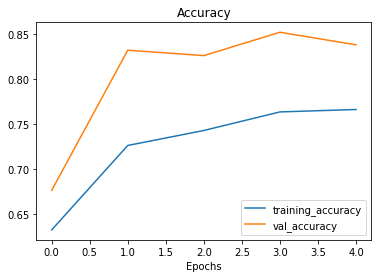

In [56]:
plot_loss_curves(history_8)

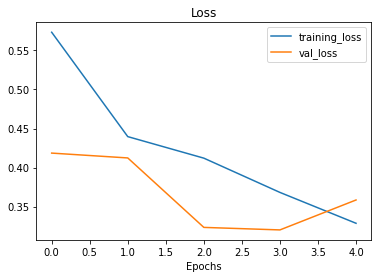

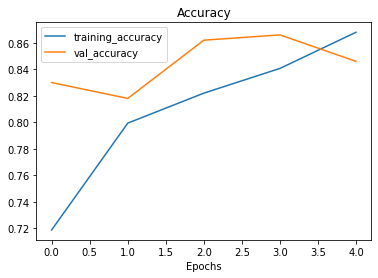

In [57]:
plot_loss_curves(history_1)

In [58]:
print(class_names)

['pizza' 'steak']


--2022-07-13 17:26:53--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.008s  

2022-07-13 17:26:53 (227 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



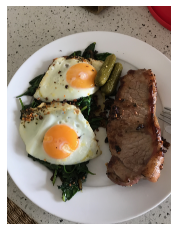

In [59]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [60]:
steak.shape

(4032, 3024, 3)

In [61]:
def load_and_prep_image(filename, img_shape=224):

  img = tf.io.read_file(filename)

  img = tf.image.decode_image(img, channels=3)

  img = tf.image.resize(img, size = [img_shape, img_shape])

  img = img/255.
  return img

In [62]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [63]:
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) 

print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [64]:
pred = model_8.predict(steak)
pred

array([[0.76666576]], dtype=float32)

In [65]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [69]:
def pred_and_plot(model, filename, class_names):

  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  pred_class = class_names[int(tf.round(pred)[0][0])]


  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

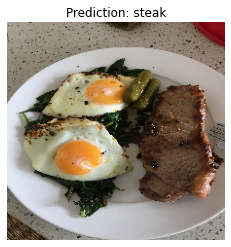

In [70]:
pred_and_plot(model_8, "03-steak.jpeg", class_names)

--2022-07-13 17:31:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2022-07-13 17:31:33 (217 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]



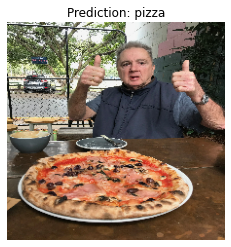

In [72]:
# Download another test image and make a prediction on it

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)